In [2]:
#!pip install pandas matplotlib seaborn numpy openpyxl

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
df = pd.read_excel(r"C:\Users\Croma Campus\Downloads\Financial_Sample.xlsx").bfill()

In [10]:
df.shape

(700, 16)

In [11]:
df.head(2)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,Low,1618.5,3,20.0,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,Low,1321.0,3,20.0,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014


In [12]:
df.isnull().sum()

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
 Sales                 0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64

In [13]:
df.describe()

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Year
count,700.000000,700.000000,700.000000,7.000000e+02,700.000000,7.000000e+02,700.000000,700.000000,700,700.000000,700.000000
mean,1603.368571,96.477143,118.331429,1.828198e+05,13173.744043,1.696091e+05,145475.211429,24133.860371,2014-04-28 21:36:00,7.900000,2013.750000
min,200.000000,3.000000,7.000000,1.799000e+03,0.000000,1.655080e+03,918.000000,-40617.500000,2013-09-01 00:00:00,1.000000,2013.000000
25%,900.750000,5.000000,12.000000,1.762500e+04,801.000000,1.592800e+04,7490.000000,2805.960000,2013-12-24 06:00:00,5.750000,2013.750000
50%,1531.000000,10.000000,20.000000,3.798000e+04,2620.125000,3.554020e+04,22506.250000,9242.200000,2014-05-16 12:00:00,9.000000,2014.000000
75%,2216.750000,250.000000,300.000000,2.790250e+05,15528.281250,2.610775e+05,245607.500000,22662.000000,2014-09-08 12:00:00,10.250000,2014.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,2014-12-01 00:00:00,12.000000,2014.000000
std,866.296955,108.602612,136.948113,2.542227e+05,22969.095872,2.367263e+05,203865.506118,42760.626563,NaN,3.377321,0.433322


In [14]:
df['Sale Price'].unique()

array([ 20.,  15., 350.,  12., 125., 300.,   7.])

In [15]:
df['Manufacturing Price'].unique()

array([  3,   5,  10, 120, 250, 260])

C:\Users\Croma Campus\AppData\Local\Temp\ipykernel_4808\2275019219.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Gross Sales'])


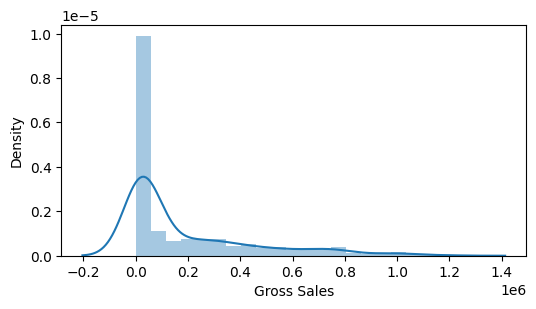

In [18]:
plt.figure(figsize=(6,3))
sns.distplot(df['Gross Sales'])
plt.show()

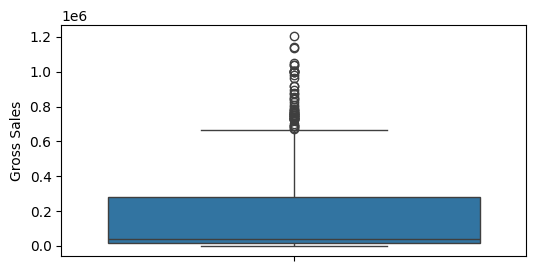

In [19]:
plt.figure(figsize=(6,3))
sns.boxplot(df['Gross Sales'])
plt.show()

In [22]:
# IQR (Interquantile Range)
# gross sale (asc :-   1,4,56,100,400 )
df['Gross Sales'].describe()

count    7.000000e+02
mean     1.828198e+05
std      2.542227e+05
min      1.799000e+03
25%      1.762500e+04
50%      3.798000e+04
75%      2.790250e+05
max      1.207500e+06
Name: Gross Sales, dtype: float64

In [24]:
# find Q1 and Q3 
# find IQR = Q3-Q1
# min_val = Q1 - IQR*1.5
# max_val = Q3 + IQR*1.5

In [25]:
Q1 = df['Gross Sales'].quantile(0.25)
Q3 = df['Gross Sales'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3 , IQR)

17625.0 279025.0 261400.0


In [26]:
min_val = Q1 - IQR*1.5
max_val = Q3 + IQR*1.5
print(min_val , max_val)

-374475.0 671125.0


In [27]:
df = df[df["Gross Sales"]<max_val] 

In [28]:
df.shape

(645, 16)

C:\Users\Croma Campus\AppData\Local\Temp\ipykernel_4808\2275019219.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Gross Sales'])


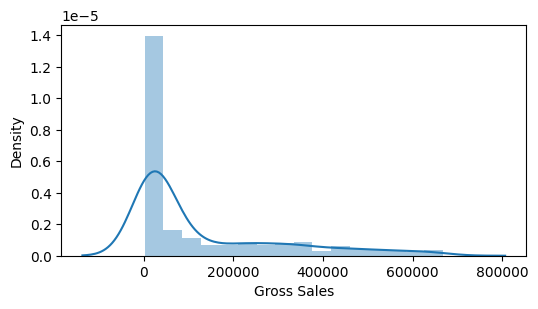

In [29]:
plt.figure(figsize=(6,3))
sns.distplot(df['Gross Sales'])
plt.show()

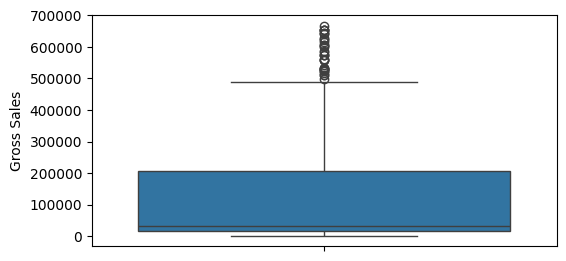

In [30]:
plt.figure(figsize=(6,3))
sns.boxplot(df['Gross Sales'])
plt.show()

In [31]:
df.describe()

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Year
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645,645.000000,645.000000
mean,1520.486047,94.837209,100.437209,126811.448837,8867.049736,117948.534899,101835.803101,16112.731798,2014-05-01 12:14:30.697674496,7.944186,2013.753488
min,200.000000,3.000000,7.000000,1799.000000,0.000000,1655.080000,918.000000,-40617.500000,2013-09-01 00:00:00,1.000000,2013.000000
25%,853.000000,5.000000,12.000000,16443.000000,703.200000,14981.250000,7080.000000,2486.250000,2014-01-01 00:00:00,6.000000,2014.000000
50%,1403.000000,10.000000,20.000000,32970.000000,2172.000000,30693.600000,19450.000000,8106.000000,2014-06-01 00:00:00,9.000000,2014.000000
75%,2101.000000,250.000000,125.000000,206700.000000,9408.000000,191231.250000,184800.000000,18568.800000,2014-10-01 00:00:00,10.000000,2014.000000
max,4492.500000,260.000000,350.000000,667450.000000,81445.000000,645300.000000,545250.000000,155250.000000,2014-12-01 00:00:00,12.000000,2014.000000
std,843.591592,108.383219,127.367034,169186.907054,14204.659972,158633.874881,141041.025963,27627.379910,NaN,3.346452,0.431314


In [43]:
df = pd.read_excel(r"C:\Users\Croma Campus\Downloads\Financial_Sample.xlsx").bfill()

In [34]:
df.isnull().sum()

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
 Sales                 0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64

In [35]:
# Z_Score

In [36]:
# 0(equal to mean) , +1,-1(1 SD Value up/down) , -2,+2(far from mean) , -3,+3(outlier)

In [37]:
# Z_Score = (X-miu)/Sigma
# miu => mean
# sigma => STD

In [38]:
df.shape

(700, 16)

In [44]:
df['z_score'] = (df['Gross Sales']-df['Gross Sales'].mean())/df['Gross Sales'].std()

In [45]:
df['z_score']

0     -0.591803
1     -0.615208
2     -0.590623
3     -0.666738
4     -0.573394
         ...   
695    2.201535
696   -0.074816
697   -0.681465
698   -0.699225
699   -0.633885
Name: z_score, Length: 700, dtype: float64

In [46]:
df['z_score'].describe()

count    7.000000e+02
mean     5.709718e-17
std      1.000000e+00
min     -7.120562e-01
25%     -6.498037e-01
50%     -5.697361e-01
75%      3.784287e-01
max      4.030640e+00
Name: z_score, dtype: float64

In [48]:
df = df[df['z_score']<3]

In [49]:
df.shape

(686, 17)

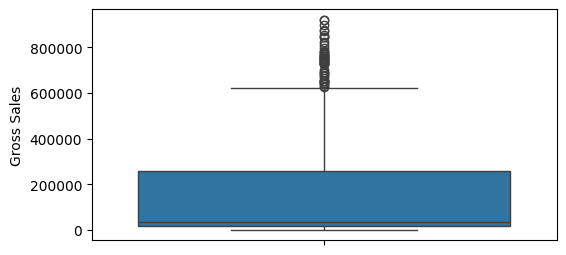

In [50]:
plt.figure(figsize=(6,3))
sns.boxplot(df['Gross Sales'])
plt.show()

In [51]:
14/7

2.0